# DTSA 5509 Supervised Learning Final Project: Pet Adoption Prediction

## Project Topic:


In the recent years, animal shelters in Los Angeles and Orange County are facing overcrowding crisis. The rate at which animals are brought into the shelters way exceeded the rate at which animals were adopted. As someone who had personally adopted two cats (one from a shelter and another from an animal rescue) and had worked with a rescue to foster four kittens for adoption, this topic is important to me. 

This project intends to perform a thorough analysis on a pet adoption dataset to better understand features that mostly contribute to adoption. This project will use supervised learning algorithms since data labels are available with the dataset. This is a regression task because the goal of the project is to predict the likelihood of a pet being adopted based on various features and attributes within this dataset.

## Data:

This project uses a single data source from the <b>🐾 Predict Pet Adoption Status Dataset 🐾</b> from kaggle. The tabulated data includes 2007 rows and 13 columns of data (total file size of 135.44 kB). There are 7 categorical features, 5 numerical features, and 1 categorical true label.
<ul>
  <li>Categorical Features: PetType, Breed, Color, Size, Vaccinated, HealthCondition, PreviousOwner</li>
  <li>Numerical Features: PetID, AgeMonths, WeightKg, TimeInShelterDays, AdoptionFee</li>
  <li>True Label: AdoptionLikelihood</li>
</ul>

Feature Details: <br>
1. <b>PetID</b>: Unique identifier for each pet. 
2. <b>PetType</b>: Type of pet (e.g., Dog, Cat, Bird, Rabbit). 
3. <b>Breed</b>: Specific breed of the pet.
4. <b>AgeMonths</b>: Age of the pet in months. 
5. <b>Color</b>: Color of the pet.
6. <b>Size</b>: Size category of the pet (Small, Medium, Large).
7. <b>WeightKg</b>: Weight of the pet in kilograms.
8. <b>Vaccinated</b>: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated). 
9. <b>HealthCondition</b>: Health condition of the pet (0 - Healthy, 1 - Medical condition). 
10. <b>TimeInShelterDays</b>: Duration the pet has been in the shelter (days). 
11. <b>AdoptionFee</b>: Adoption fee charged for the pet (in dollars).
12. <b>PreviousOwner</b>: Whether the pet had a previous owner (0 - No, 1 - Yes).
13. <b>AdoptionLikelihood</b>: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

<i>APA Citation: Rabie El kharoua. (2024). 🐾 Predict Pet Adoption Status Dataset 🐾 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/5242440</i>

In [31]:
# Import pandas library and read the .csv dataset
import pandas as pd
df = pd.read_csv('data/pet_adoption_data.csv')

In [32]:
# Display the dataset info including data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [33]:
# Display the first 5 rows of data
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


## Data Cleaning:

The process for cleaning the data is as follows: 

1. Remove irrelevant columns (PetID, WeightKg, Breed) using domain knowledge.
<ul>
    <li>PetID has never been a factor on the adoption decision.</li>
    <li>WeightKg is often an insignifant factor on the adoption decision.</li>
    <li>Breed is chosen to be removed due to similar information with PetType column.</li>
</ul>
2. Identify data row and/or column with NA and drop if necessary. <br>
3. Identify data imbalance. 
<ul>
    <li>PetType is likely to be one of the most significant factors on the adoption decision. It is important to understand data imbalance in this column (if any).</li>
    <li>Check AdoptionLikelihood to see whether the number of samples for each category are balanced</li>
</ul>
4. Convert categorical data to numerical data.
<ul>
    <li>Ordinal categorical variable, in which order has meaning, will be converted to numerical variables. This includes Size column.</li>
    <li>Other categorical variables will be binarized, where the column will be tranform into multiple binary columns of 0 and 1. This includes PetType and Color.</li>
    <li>Conversion is not needed for Vaccinated, HealthCondition, and PreviousOwner columns because despite that they categorical, the values in these columns are numerical.
</ul>

In [34]:
# Step 1: Remove irrelevant columns (PetID, WeightKg, Breed) using domain knowledge
df = df.drop(columns=['PetID', 'WeightKg', 'Breed'])
df.head()

,PetType,AgeMonths,Color,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,131,Orange,Large,1,0,27,140,0,0
1,Rabbit,73,White,Large,0,0,8,235,0,0
2,Dog,136,Orange,Medium,0,0,85,385,0,0
3,Bird,97,White,Small,0,0,61,217,1,0
4,Rabbit,123,Gray,Large,0,0,28,14,1,0


Step 1 Summary: Columns <i>PetID</i>, <i>WeightKg</i>, and <i>Breed</i> are dropped successfully.

In [35]:
# Step 2: Identify data row and/or column with NA and drop if necessary.
columns = df.columns.tolist()
for col in columns:
    nan_count = df[col].isna().sum()
    print(col + ":", nan_count)

PetType: 0
AgeMonths: 0
Color: 0
Size: 0
Vaccinated: 0
HealthCondition: 0
TimeInShelterDays: 0
AdoptionFee: 0
PreviousOwner: 0
AdoptionLikelihood: 0


Step 2 Summary: No data is drop as a result because no NA data is present.

In [36]:
# Step 3: Identify data imbalance
df.groupby(["PetType"]).size()

PetType
Bird      487
Cat       505
Dog       522
Rabbit    493
dtype: int64

In [37]:
df.groupby(["AdoptionLikelihood"]).size()

AdoptionLikelihood
0    1348
1     659
dtype: int64

Step 3 Summary: The number of samples by PetType are relatively balance with only 6.7% of data size difference when comparing max data size (522) to min data size (487). However, the number of samples by AdoptionLikelihood are imbalanced. The negative label (659) is twice as much as that of the positive label (1348). The decision is made not to trim down the dataset size, but instead the imbalance of the class will be handled later during the training.

In [43]:
# Step 4: Convert categorical data to numerical data.
# The following method can be used to find unique values in a dataframe column: set(df[<column name>].tolist())
print("PetType:", set(df["PetType"].tolist())) # categorical
print("Color:", set(df["Color"].tolist())) # categorical
print("Size:", set(df["Size"].tolist())) # ordinal categorical

PetType: {'Dog', 'Bird', 'Cat', 'Rabbit'}
Color: {'Gray', 'Brown', 'Black', 'Orange', 'White'}
Size: {'Medium', 'Small', 'Large'}


In [44]:
# Convert ordinal categorical variable (Size) to numerical values
mapSize = {
    'Small': 0, 
    'Medium': 1, 
    'Large': 2
}
df["Size"] = df["Size"].replace(mapSize)
df["Size"].head()

0    2
1    2
2    1
3    0
4    2
Name: Size, dtype: int64

In [45]:
# Binarize non-ordinal categorical variables (PetType and Color)
# To binarize PetType, PetType column will be removed and the following columns will be added:
#     IsRabbit, IsBird, IsDog, IsCat
# To binarize Color, Color column will be removed and the following columns will be aded:
#     IsBrown, IsBlack, IsGray, IsWhite, IsOrange

# Get number of rows in the df
numRows = df.shape[0]

# Initialize new list for storing new column values
isRabbit = [0]*numRows
isBird = [0]*numRows
isDog = [0]*numRows
isCat = [0]*numRows

isBrown = [0]*numRows
isBlack = [0]*numRows
isGray = [0]*numRows
isWhite = [0]*numRows
isOrange = [0]*numRows

# Update lists to contain appropriate binary values
for i in range(numRows):
    petType = df.loc[i, "PetType"]
    color = df.loc[i, "Color"]
    
    if petType == "Rabbit":
        isRabbit[i] = 1
    elif petType == "Bird":
        isBird[i] = 1
    elif petType == "Dog":
        isDog[i] = 1
    elif petType == "Cat":
        isCat[i] = 1

    if color == "Brown":
        isBrown[i] = 1
    elif color == "Black":
        isBlack[i] = 1
    elif color == "Gray": 
        isGray[i] = 1
    elif color == "White":
        isWhite[i] = 1
    elif color == "Orange":
        isOrange[i] = 1
    
# Add new binalized columns
df["IsRabbit"] = isRabbit
df["IsBird"] = isBird
df["IsDog"] = isDog
df["IsCat"] = isCat
df["IsBrown"] = isBrown
df["IsBlack"] = isBlack
df["IsGray"] = isGray
df["IsWhite"] = isWhite
df["IsOrange"] = isOrange

df = df.drop(columns=['PetType', 'Color'])
df.head()

,AgeMonths,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,IsRabbit,IsBird,IsDog,IsCat,IsBrown,IsBlack,IsGray,IsWhite,IsOrange
0,131,2,1,0,27,140,0,0,0,1,0,0,0,0,0,0,1
1,73,2,0,0,8,235,0,0,1,0,0,0,0,0,0,1,0
2,136,1,0,0,85,385,0,0,0,0,1,0,0,0,0,0,1
3,97,0,0,0,61,217,1,0,0,1,0,0,0,0,0,1,0
4,123,2,0,0,28,14,1,0,1,0,0,0,0,0,1,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   AgeMonths           2007 non-null   int64
 1   Size                2007 non-null   int64
 2   Vaccinated          2007 non-null   int64
 3   HealthCondition     2007 non-null   int64
 4   TimeInShelterDays   2007 non-null   int64
 5   AdoptionFee         2007 non-null   int64
 6   PreviousOwner       2007 non-null   int64
 7   AdoptionLikelihood  2007 non-null   int64
 8   IsRabbit            2007 non-null   int64
 9   IsBird              2007 non-null   int64
 10  IsDog               2007 non-null   int64
 11  IsCat               2007 non-null   int64
 12  IsBrown             2007 non-null   int64
 13  IsBlack             2007 non-null   int64
 14  IsGray              2007 non-null   int64
 15  IsWhite             2007 non-null   int64
 16  IsOrange            2007 non-null   int64


Step 4 Summary: Ordinal categorical variable (Size) has been converted to numerical values. Non-ordinal categorical variables (PetType and Color) have been binarized into additional columns successfully. The column data types are converted to int64.

In conclusion, we have found the pet adoption dataset to be relatively balanced and contain no NA data. However, some insignificant features like PetID, WeightKg, and Breed are removed from the dataset based on domain knowledge and redundancy. The dataset also require data type conversion for converting both ordinal and non-ordinal categorical features to numerical values. One foreseen difficulty is dealing with multiple columns of non-ordinal categorical features as they need to be binalized, and when they do it significantly increases the number of total features for the problem.

Note: Visualizations of the dataframe table and info are shown throughout the cleaning process.

## Exploratory Data Analysis (EDA):

In [12]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Univariate Analysis using Box Plots

Univariate analysis focuses on understanding the characteristics of a single variable. For this analysis, only non-binary (0 or 1) variables including AgeMonths, TimeInShelterDays, and AdoptionFee will be analyzed to identify potential outliers.

In [13]:
df.describe()[["AgeMonths", "TimeInShelterDays", "AdoptionFee"]]

,AgeMonths,TimeInShelterDays,AdoptionFee
count,2007.000000,2007.000000,2007.000000
mean,92.279522,43.974091,249.142003
std,52.148363,25.740253,142.887040
min,1.000000,1.000000,0.000000
25%,48.000000,21.000000,127.000000
50%,94.000000,45.000000,242.000000
75%,138.000000,66.000000,375.000000
max,179.000000,89.000000,499.000000


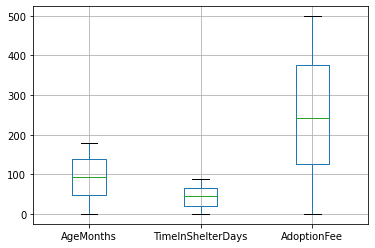

In [26]:
boxplot = df.boxplot(column=['AgeMonths', 'TimeInShelterDays', 'AdoptionFee'])

The resulting box plots show no outlier for variables AgeMonths, TimeInShelterDays, and AdoptionFee. This indicates that the min and max data points are within 1.5 times the interquartile range (as shown in the box).

### 2. Bivariate Analysis using Correlation Matrix 

The correlation matrix shows the relationships between any two variables on the x-axis and y-axis. The value in each cell, known as the correlation coefficient, indicates how strong the correlation between the variables are.  

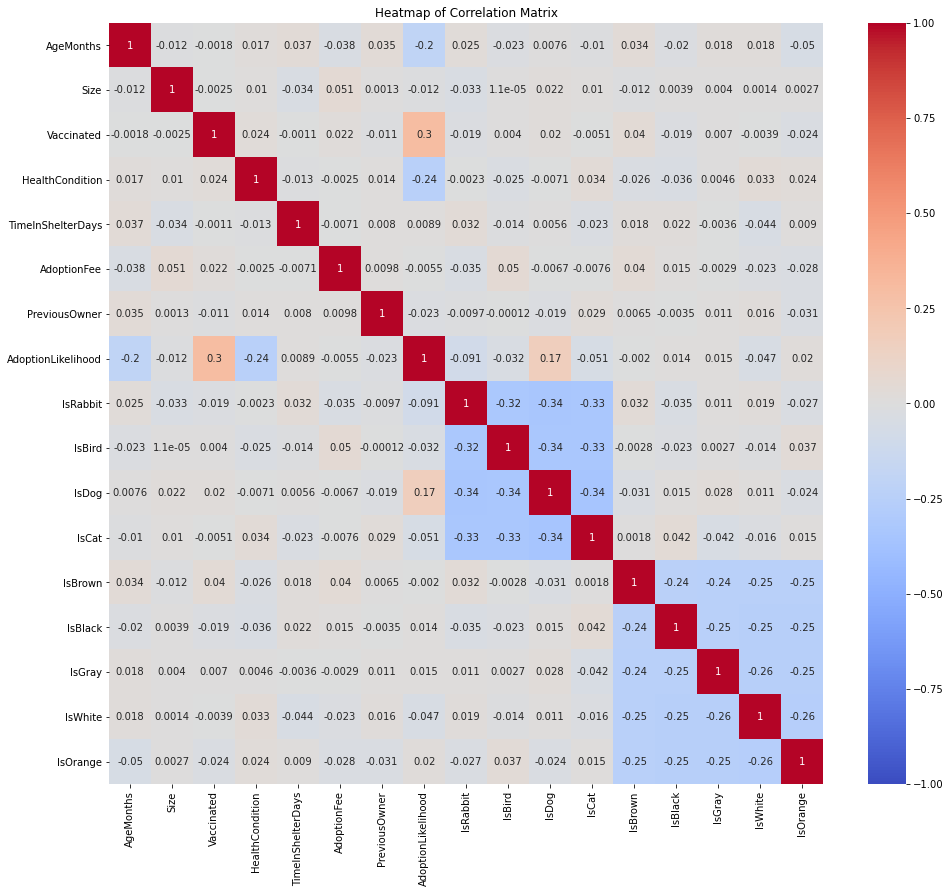

In [24]:
plt.figure(figsize = (16,14))
sns.heatmap(data = df.corr(), cmap = 'coolwarm', annot=True, vmin=-1, vmax=1)
plt.title("Heatmap of Correlation Matrix")
plt.show()

For this dataset, the matrix shows that there are low correlations between features since all of the correlation coefficient magnitudes are significantly lower than 0.7. Although the features are low correlated, looking at the matrix, top three features that may be the best guess estimators for AdoptionLikelihood are Vaccinated, HealthCondition, and AgeMonths with correlation coefficients of 0.3, -0.24, and -0.2 respectively.

### 3. Multivariate Analysis using Pair Plots

The pair plots are used to visualize relationships across many variables to identify any correlation or collinearity.

C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pitac\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

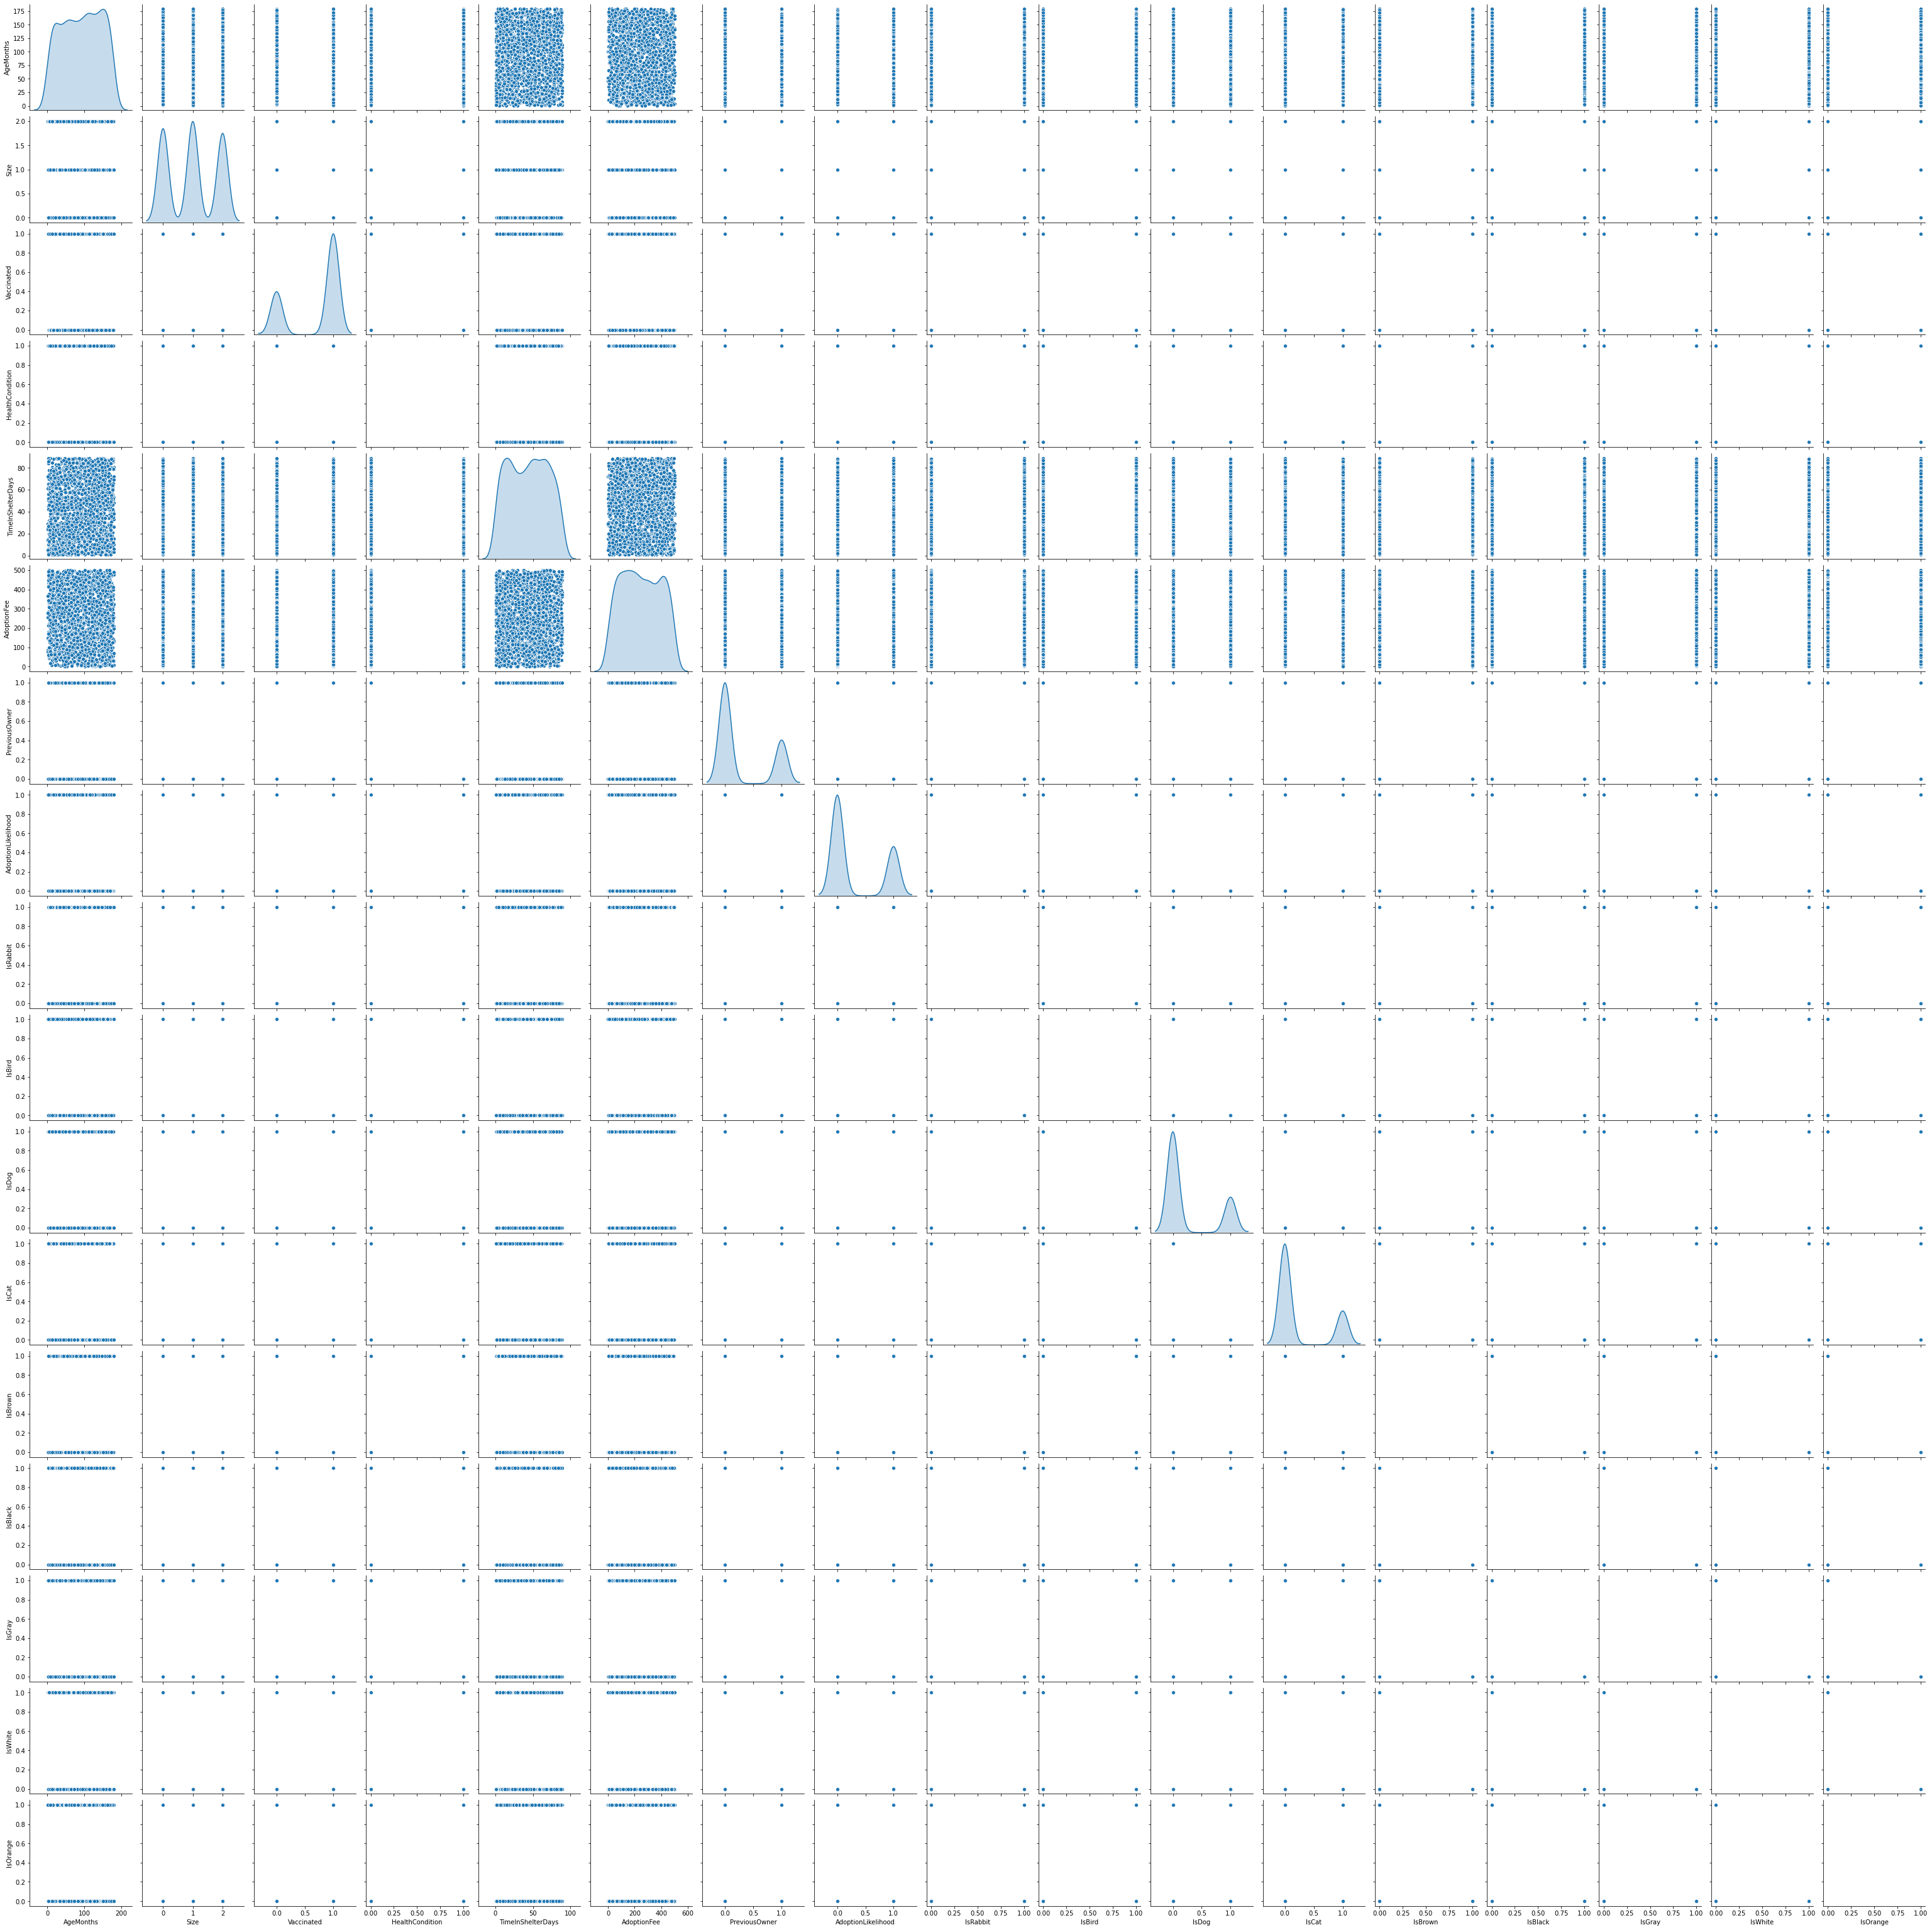

In [27]:
# Warning: The following code takes a long time to run
sns.pairplot(data = df, diag_kind="kde")
plt.show()

The pair plot above shows no strong correlation between the variables. No narrow distribution is observed along the diagonal.

## Model

An appropriate model for this pet adoption dataset would be a regression model that includes all of the features. Since linear regression and polynomial regression are based on only one feature (a single best estimator), these two choices will be eliminated. Other choices of model that are appropriate for this project include multiple linear regression, random forest, and adaboost regression, all of which can handle many features.

### Multiple Linear Regression

In [59]:
import statsmodels.formula.api as smf

# Iter 1
# Format the formula to predict AdoptionLikelihood using all features WITHOUT interactions
features = df.columns.tolist()
features.remove('AdoptionLikelihood')
features = ' + '.join(features)
formula = "AdoptionLikelihood ~ " + features 
print("formula:", formula)

# Full data (df) is used to train the multiple linear regression model 
model = smf.ols(formula = formula, data=df).fit()
model.summary()

formula: AdoptionLikelihood ~ AgeMonths + Size + Vaccinated + HealthCondition + TimeInShelterDays + AdoptionFee + PreviousOwner + IsRabbit + IsBird + IsDog + IsCat + IsBrown + IsBlack + IsGray + IsWhite + IsOrange


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AdoptionLikelihood   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     40.88
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           9.83e-99
Time:                        20:51:13   Log-Likelihood:                -1077.4
No. Observations:                2007   AIC:                             2185.
Df Residuals:                    1992   BIC:                             2269.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2384      0.024      9.793      0.000       0.191       0.286
AgeMonths            -0.0018      0.000     -9.954      0.000      -0.002      -0.001
Size                 -0.0084      0.012     -0.726      0.468      -0.031       0.014
Vaccinated            0.3120      0.020     15.373      0.000       0.272       0.352
HealthCondition      -0.2913      0.023    -12.441      0.000      -0.337      -0.245
TimeInShelterDays     0.0002      0.000      0.582      0.561      -0.000       0.001
AdoptionFee       -6.277e-05   6.52e-05     -0.962      0.336      -0.000    6.52e-05
PreviousOwner        -0.0057      0.020     -0.280      0.779      -0.045       0.034
IsRabbit             -0.0052      0.017     -0.303      0.762      -0.039       0.029
IsBird                0.0250      0.017      1.436      0.151      -0.009       0.059
IsDog                 0.1918      0.017     11.246      0.000       0.158       0.225
IsCat                 0.0267      0.017      1.559      0.119      -0.007       0.060
IsBrown               0.0399      0.020      2.011      0.044       0.001       0.079
IsBlack               0.0510      0.019      2.638      0.008       0.013       0.089
IsGray                0.0605      0.019      3.136      0.002       0.023       0.098
IsWhite               0.0157      0.019      0.834      0.405      -0.021       0.053
IsOrange              0.0714      0.019      3.774      0.000       0.034       0.108
==============================================================================
Omnibus:                      682.465   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.068
Skew:                           0.411   Prob(JB):                     1.57e-33
Kurtosis:                       1.937   Cond. No.                     1.43e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the OLS Regression Results, insignificant features can be identified from features with large p-value (0.05 or greater). Insignificant features include Size, TimeInShelterDays, AdoptionFee, PreviousOwner, IsRabbit, IsBird, IsCat, and IsWhite. Large p-value may also indicate that there are collinearities between the features. Low value of adjusted R-squared (0.218) indicates that the model does not fit the data very well. Before removing the insignificant features, the model will be trained again but with interactions.   

In [76]:
# Iter 2
# Format the formula to predict AdoptionLikelihood using all features WITH interactions
features = df.columns.tolist()
features.remove('AdoptionLikelihood')

interactions = []
for f1 in features:
    for f2 in features:
        if f1 != f2:
            interactions.append(f1 + "*" + f2)
interactions = ' + '.join(interactions)
features = ' + '.join(features)
formula = "AdoptionLikelihood ~ " + features + " + " + interactions
print("formula:", formula)

# Full data (df) is used to train the multiple linear regression model 
model = smf.ols(formula = formula, data=df).fit()
model.summary()

formula: AdoptionLikelihood ~ AgeMonths + Size + Vaccinated + HealthCondition + TimeInShelterDays + AdoptionFee + PreviousOwner + IsRabbit + IsBird + IsDog + IsCat + IsBrown + IsBlack + IsGray + IsWhite + IsOrange + AgeMonths*Size + AgeMonths*Vaccinated + AgeMonths*HealthCondition + AgeMonths*TimeInShelterDays + AgeMonths*AdoptionFee + AgeMonths*PreviousOwner + AgeMonths*IsRabbit + AgeMonths*IsBird + AgeMonths*IsDog + AgeMonths*IsCat + AgeMonths*IsBrown + AgeMonths*IsBlack + AgeMonths*IsGray + AgeMonths*IsWhite + AgeMonths*IsOrange + Size*AgeMonths + Size*Vaccinated + Size*HealthCondition + Size*TimeInShelterDays + Size*AdoptionFee + Size*PreviousOwner + Size*IsRabbit + Size*IsBird + Size*IsDog + Size*IsCat + Size*IsBrown + Size*IsBlack + Size*IsGray + Size*IsWhite + Size*IsOrange + Vaccinated*AgeMonths + Vaccinated*Size + Vaccinated*HealthCondition + Vaccinated*TimeInShelterDays + Vaccinated*AdoptionFee + Vaccinated*PreviousOwner + Vaccinated*IsRabbit + Vaccinated*IsBird + Vaccinated*

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AdoptionLikelihood   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7.189
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           1.59e-74
Time:                        21:14:15   Log-Likelihood:                -1021.3
No. Observations:                2007   AIC:                             2237.
Df Residuals:                    1910   BIC:                             2780.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.2227      0.058      3.820      0.000       0.108       0.337
AgeMonths                            -0.0014      0.000     -3.258      0.001      -0.002      -0.001
Size                                 -0.0061      0.029     -0.208      0.836      -0.064       0.051
Vaccinated                            0.2875      0.050      5.807      0.000       0.190       0.385
HealthCondition                      -0.1431      0.062     -2.293      0.022      -0.265      -0.021
TimeInShelterDays                    -0.0005      0.001     -0.557      0.577      -0.002       0.001
AdoptionFee                        3.744e-05      0.000      0.243      0.808      -0.000       0.000
PreviousOwner                        -0.0881      0.054     -1.630      0.103      -0.194       0.018
IsRabbit                             -0.0179      0.054     -0.330      0.742      -0.124       0.088
IsBird                                0.0181      0.054      0.333      0.739      -0.089       0.125
IsDog                                 0.1797      0.053      3.409      0.001       0.076       0.283
IsCat                                 0.0428      0.053      0.801      0.423      -0.062       0.148
IsBrown                               0.0298      0.064      0.465      0.642      -0.096       0.156
IsBlack                               0.0038      0.060      0.064      0.949      -0.114       0.122
IsGray                                0.1060      0.057      1.865      0.062      -0.005       0.217
IsWhite                               0.0119      0.057      0.209      0.835      -0.100       0.124
IsOrange                              0.0712      0.055      1.291      0.197      -0.037       0.179
AgeMonths:Size                    -1.703e-06      0.000     -0.007      0.994      -0.000       0.000
AgeMonths:Vaccinated                 -0.0008      0.000     -1.905      0.057      -0.002    2.22e-05
AgeMonths:HealthCondition             0.0014      0.000      2.884      0.004       0.000       0.002
AgeMonths:TimeInShelterDays         1.06e-05   7.06e-06      1.501      0.134   -3.25e-06    2.44e-05
AgeMonths:AdoptionFee              3.828e-07   1.27e-06      0.300      0.764   -2.12e-06    2.88e-06
AgeMonths:PreviousOwner           -6.652e-05      0.000     -0.166      0.868      -0.001       0.001
AgeMonths:IsRabbit                   -0.0002      0.000     -0.502      0.615      -0.001       0.000
AgeMonths:IsBird                     -0.0003      0.000     -0.787      0.431      -0.001       0.000
AgeMonths:IsDog                      -0.0002      0.000     -0.541      0.588      -0.001       0.000
AgeMonths:IsCat                      -0.0008      0.000     -2.351      0.019      -0.001      -0.000
AgeMonths:IsBrown      

There is a slight improvement on the adjusted R-squared value from 0.218 (without interactions) to 0.229 (with interactions). The next iteration of training will have all features with large p-value (0.05 or greater) removed. 

In [77]:
# Iter 3
# Format the formula to predict AdoptionLikelihood using only SIGNIFICANT features WITH interactions
formula = "AdoptionLikelihood ~ AgeMonths+Vaccinated+HealthCondition+IsDog+AgeMonths*HealthCondition+AgeMonths*IsCat+AgeMonths*IsOrange+Vaccinated*HealthCondition+Vaccinated*IsBird+Vaccinated*IsDog+Vaccinated*IsGray+Vaccinated*IsOrange+HealthCondition*IsGray+PreviousOwner*IsBrown"

# Full data (df) is used to train the multiple linear regression model 
model = smf.ols(formula = formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AdoptionLikelihood   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     32.60
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.52e-107
Time:                        21:21:10   Log-Likelihood:                -1045.9
No. Observations:                2007   AIC:                             2134.
Df Residuals:                    1986   BIC:                             2252.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2409      0.040      6.026      0.000       0.163       0.319
AgeMonths                     -0.0017      0.000     -7.286      0.000      -0.002      -0.001
Vaccinated                     0.3164      0.034      9.325      0.000       0.250       0.383
HealthCondition               -0.1705      0.061     -2.792      0.005      -0.290      -0.051
IsDog                          0.1503      0.043      3.485      0.001       0.066       0.235
AgeMonths:HealthCondition      0.0014      0.000      3.091      0.002       0.001       0.002
IsCat                          0.0700      0.045      1.543      0.123      -0.019       0.159
AgeMonths:IsCat               -0.0006      0.000     -1.373      0.170      -0.001       0.000
IsOrange                       0.0407      0.057      0.715      0.475      -0.071       0.152
AgeMonths:IsOrange            -0.0008      0.000     -1.823      0.068      -0.002    6.03e-05
Vaccinated:HealthCondition    -0.3215      0.052     -6.229      0.000      -0.423      -0.220
IsBird                        -0.0096      0.043     -0.222      0.825      -0.095       0.076
Vaccinated:IsBird              0.0448      0.050      0.903      0.366      -0.052       0.142
Vaccinated:IsDog               0.0619      0.049      1.265      0.206      -0.034       0.158
IsGray                         0.0095      0.045      0.209      0.834      -0.079       0.098
Vaccinated:IsGray              0.0556      0.052      1.062      0.288      -0.047       0.158
Vaccinated:IsOrange            0.1012      0.051      1.993      0.046       0.002       0.201
HealthCondition:IsGray        -0.1108      0.058     -1.894      0.058      -0.225       0.004
PreviousOwner                  0.0094      0.022      0.423      0.672      -0.034       0.053
IsBrown                        0.0323      0.030      1.083      0.279      -0.026       0.091
PreviousOwner:IsBrown         -0.0887      0.051     -1.754      0.080      -0.188       0.010
==============================================================================
Omnibus:                      238.594   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.260
Skew:                           0.403   Prob(JB):                     6.92e-25
Kurtosis:                       2.175   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a slight improvement on the adjusted R-squared value from 0.229 (Iter 2) to 0.240 (Iter 3). The next iteration of training will remove additional features with large p-value (0.05 or greater). 

In [78]:
# Iter 4
# Format the formula to predict AdoptionLikelihood using only SIGNIFICANT features WITH interactions
formula = "AdoptionLikelihood ~ AgeMonths+Vaccinated+HealthCondition+IsDog+AgeMonths:HealthCondition+Vaccinated:HealthCondition+Vaccinated:IsOrange"

# Full data (df) is used to train the multiple linear regression model 
model = smf.ols(formula = formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AdoptionLikelihood   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     90.54
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          7.81e-115
Time:                        21:24:54   Log-Likelihood:                -1054.5
No. Observations:                2007   AIC:                             2125.
Df Residuals:                    1999   BIC:                             2170.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2649      0.026     10.096      0.000       0.213       0.316
AgeMonths                     -0.0020      0.000    -10.443      0.000      -0.002      -0.002
Vaccinated                     0.3620      0.023     15.863      0.000       0.317       0.407
HealthCondition               -0.1782      0.061     -2.933      0.003      -0.297      -0.059
IsDog                          0.1812      0.021      8.675      0.000       0.140       0.222
AgeMonths:HealthCondition      0.0013      0.000      2.922      0.004       0.000       0.002
Vaccinated:HealthCondition    -0.3296      0.051     -6.432      0.000      -0.430      -0.229
Vaccinated:IsOrange            0.0589      0.027      2.143      0.032       0.005       0.113
==============================================================================
Omnibus:                      281.024   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.381
Skew:                           0.395   Prob(JB):                     8.82e-26
Kurtosis:                       2.130   Cond. No.                         867.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In conclusion, multiple linear regresssion is not a robust model for this dataset. The model underfitting might be due to weak correlation between other features and AdoptionLikelihood.

### Split Train Test Dataset 

The stratified k-fold cross-validation method will be used for sampling the training and test data. This method ensures that each split of data maintains the same label distribution as in the original dataset to combat data imbalance issue. 

In [103]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
x = df.loc[:, df.columns != 'AdoptionLikelihood'].to_numpy()
y = df.loc[:, 'AdoptionLikelihood'].to_numpy()

x_train_folds = [] # list of numpy arrays
x_test_folds = [] # list of numpy arrays
y_train_folds = [] # list of numpy arrays
y_test_folds = [] # list of numpy arrays
# Split data n_splits times
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Store each split of data in lists for later use
    x_train_folds.append(x_train_fold)
    x_test_folds.append(x_test_fold)
    y_train_folds.append(y_train_fold)
    y_test_folds.append(y_test_fold)

In [104]:
# Function for converting label values of 0.5 or greater to 1 and less than 0.5 to 0
def getFinalLabels(y_pred):
    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

In [177]:
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Function for training and testing with split data
def train_test_rf(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits, max_depth, max_features):
    test_acc = []
    train_acc = []
    test_f1 = []
    
    for k in range(n_splits):
        regr = RandomForestRegressor(max_depth=max_depth, max_features=max_features, random_state=0)
        regr.fit(x_train_folds[k], y_train_folds[k]) # Train the model on training data
        
        # Get test prediction and metrics
        y_pred_test = regr.predict(x_test_folds[k]) # Get predictions on test data
        getFinalLabels(y_pred_test) # Convert any values 0.5 or greater to 1 and less than 0.5 to 0
        test_balanced_acc = balanced_accuracy_score(y_test_folds[k], y_pred_test) 
        test_acc.append(test_balanced_acc)
        test_f1_score = f1_score(y_test_folds[k], y_pred_test)
        test_f1.append(test_f1_score)
        
        # Get train prediction and metrics
        y_pred_train = regr.predict(x_train_folds[k]) # Get predictions on training data
        getFinalLabels(y_pred_train) # Convert any values 0.5 or greater to 1 and less than 0.5 to 0
        train_balanced_acc = balanced_accuracy_score(y_train_folds[k], y_pred_train) 
        train_acc.append(train_balanced_acc)
    
    return train_acc, test_acc, test_f1

def train_test_ab(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits):
    test_acc = []
    train_acc = []
    test_f1 = []
    
    for k in range(n_splits):
        regr = AdaBoostRegressor(random_state=0, n_estimators=100)
        regr.fit(x_train_folds[k], y_train_folds[k]) # Train the model on training data
        
        # Get test prediction and metrics
        y_pred_test = regr.predict(x_test_folds[k]) # Get predictions on test data
        getFinalLabels(y_pred_test) # Convert any values 0.5 or greater to 1 and less than 0.5 to 0
        test_balanced_acc = balanced_accuracy_score(y_test_folds[k], y_pred_test) 
        test_acc.append(test_balanced_acc)
        test_f1_score = f1_score(y_test_folds[k], y_pred_test)
        test_f1.append(test_f1_score)
        
        # Get train prediction and metrics
        y_pred_train = regr.predict(x_train_folds[k]) # Get predictions on training data
        getFinalLabels(y_pred_train) # Convert any values 0.5 or greater to 1 and less than 0.5 to 0
        train_balanced_acc = balanced_accuracy_score(y_train_folds[k], y_pred_train) 
        train_acc.append(train_balanced_acc)
    
    return train_acc, test_acc, test_f1

### Random Forest

A random forest regressor model is created with max_depth set to 2.

In [171]:
# Create a random forest regressor model
# max_depth = 2, max_features = None
train_acc, test_acc, test_f1 = train_test_rf(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits, 2, None)

print(train_acc)
print(test_acc)
print(test_f1)

[0.6235931322675697, 0.6044276948315983, 0.6277829313543599, 0.6173595271466834, 0.616079263778219]
[0.5913299663299663, 0.6155723905723907, 0.5864998586372632, 0.638433592429875, 0.6156359130336826]
[0.3391812865497076, 0.37804878048780494, 0.32941176470588235, 0.44318181818181823, 0.3832335329341317]


#### Hyperparameter Tuning for Random Forest

For hyperparameter tuning, the algorithm will explore different values of max_depth and max_features to see if the test balanced accuracy can be improved. The definitions of the hyperparameters are as follows:
<ul>
    <li>max_depth: max number of depth in each decision tree</li>
    <li>max_features: max number of features to be used for splitting a node</li>
</ul>

In [174]:
# Create a random forest regressor model
for d in range(2,15): # loop through different combo of max_depth
    for f in range(2,10): # loop through different combo of max_features
        # max_depth = d, max_features = f
        _, test_acc, _ = train_test_rf(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits, d, f)
        print("max_depth:", d, ", max_features:", f, ", test_acc:", sum(test_acc)/n_splits)

max_depth: 2 , max_features: 2 , test_acc: 0.5075873236178581
max_depth: 2 , max_features: 3 , test_acc: 0.5409779731153777
max_depth: 2 , max_features: 4 , test_acc: 0.5895374868275631
max_depth: 2 , max_features: 5 , test_acc: 0.6066428920245713
max_depth: 2 , max_features: 6 , test_acc: 0.609302824684504
max_depth: 2 , max_features: 7 , test_acc: 0.6087028227544417
max_depth: 2 , max_features: 8 , test_acc: 0.6090914049831726
max_depth: 2 , max_features: 9 , test_acc: 0.60760716981864
max_depth: 3 , max_features: 2 , test_acc: 0.5455349937029326
max_depth: 3 , max_features: 3 , test_acc: 0.5921863674917109
max_depth: 3 , max_features: 4 , test_acc: 0.6210677477691298
max_depth: 3 , max_features: 5 , test_acc: 0.6260061907228399
max_depth: 3 , max_features: 6 , test_acc: 0.6772416093165831
max_depth: 3 , max_features: 7 , test_acc: 0.6579049311469357
max_depth: 3 , max_features: 8 , test_acc: 0.6662730729640971
max_depth: 3 , max_features: 9 , test_acc: 0.7249569123129668
max_depth: 

The highest test balanced accuracy of 0.869 is reached when max_depth = 13 and max_features = 9. The general trends show that the test balanced accuracy increases as max_depth and max_features increase. However, at a certain point, the test balanced accuracy reaches its plateau.

The training and test balanced metrics on the random forest with the best combination of hyperpameters will be saved for later plotting. The metric values will be saved for each k fold.

In [175]:
# Create a random forest regressor model
# max_depth=13, max_features=9
rf_train_acc, rf_test_acc, rf_test_f1 = train_test_rf(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits, 13, 9)

print(rf_train_acc)
print(rf_test_acc)
print(rf_test_f1)
print(sum(rf_test_acc)/n_splits)

[0.9985874115041911, 0.9995361781076066, 1.0, 0.9971537001897532, 0.9971537001897532]
[0.8699494949494949, 0.8736531986531986, 0.8556403731976252, 0.8639883969809621, 0.881139461529796]
[0.8333333333333334, 0.8400000000000001, 0.8181818181818182, 0.831275720164609, 0.8492063492063493]
0.8688741850622153


### AdaBoost Regression 

In [178]:
# Create a AdaBoost regressor model
#n_estimators=100
ab_train_acc, ab_test_acc, ab_test_f1 = train_test_ab(x_train_folds, x_test_folds, y_train_folds, y_test_folds, n_splits)

print(ab_train_acc)
print(ab_test_acc)
print(ab_test_f1)
print(sum(ab_test_acc)/n_splits)

[0.873309734450965, 0.8480503638405509, 0.8757730364873222, 0.8586759825757562, 0.8485270816150312]
[0.861026936026936, 0.8471380471380472, 0.8253322024314391, 0.8583417821336037, 0.8657063197026023]
[0.8104089219330856, 0.8065843621399176, 0.775, 0.823045267489712, 0.8389830508474577]
0.8515090574865256


## Results and Analysis 

The dataset is trained and tested on both Random Forest Regressor and AdaBoost Regressor models. Since the dataset is imbalanced (more no adoption cases than adoption cases), many steps are taken to ensure that data imbalance is handled properly. 

First, the train and test dataset is split by using the StratifiedKFold method, where each split of data contains the same distribution of true labels (AdoptionLikelihood column). This is to prevent the case where the split train or test set not having enough of the minority label (=adoption cases). 

Second, model metrics are carefully chosen to combat data imbalance issue. Metrics like accuracy are avoided since it is not a good representative metric on the imbalance data. Instead, two metrics chosen are balanced accuracy and f1 score. Balanced accuracy is the average accuracy of both minority and majority label predictions. F1 score is another good metric because it gives more emphasis to the positive label (=adoption cases) which also happens to be the minority label.

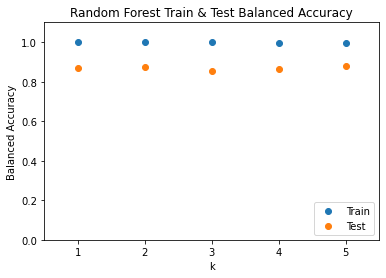

In [179]:
# Plot Random forest train and test balanced accuracy for each k
plt.scatter([1,2,3,4,5], rf_train_acc)
plt.scatter([1,2,3,4,5], rf_test_acc)
plt.xlabel("k")
plt.ylabel("Balanced Accuracy")
plt.title("Random Forest Train & Test Balanced Accuracy")
plt.legend(["Train", "Test"], loc="lower right")
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0.5, 5.5])
plt.show()

The above plot shows the train and test balanced accuracy of the Random Forest Regressor over k=5 data split. In all splits, the train balanced accuracy is close to 1, indicating that the model might be overfitting a bit. However, the test balanced accuracy is decent (average of 0.869 across all 5 runs).

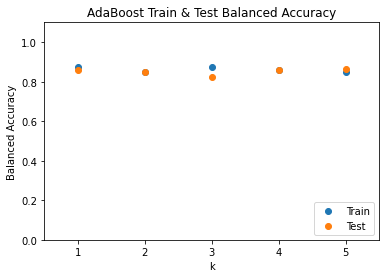

In [180]:
# Plot AdaBoost train and test balanced accuracy for each k
plt.scatter([1,2,3,4,5], ab_train_acc)
plt.scatter([1,2,3,4,5], ab_test_acc)
plt.xlabel("k")
plt.ylabel("Balanced Accuracy")
plt.title("AdaBoost Train & Test Balanced Accuracy")
plt.legend(["Train", "Test"], loc="lower right")
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0.5, 5.5])
plt.show()

The above plot shows the train and test balanced accuracy of the AdaBoost Regressor over k=5 data split. In all splits, the train balanced accuracy is close 0.9, indicating that the model does not overfit as much as the Random Forest case. The test balanced accuracy is 0.852 on average across all 5 runs.

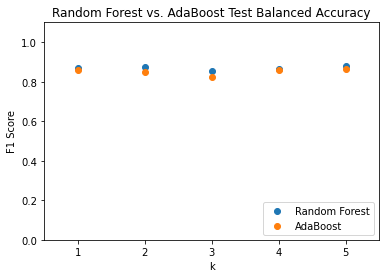

In [181]:
# Plot Random Forest vs. AdaBoost Test Balanced Accuracy
plt.scatter([1,2,3,4,5], rf_test_acc)
plt.scatter([1,2,3,4,5], ab_test_acc)
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.title("Random Forest vs. AdaBoost Test Balanced Accuracy")
plt.legend(["Random Forest", "AdaBoost"], loc="lower right")
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0.5, 5.5])
plt.show()

The above plot compares the test balanced accuracy of Random Forest and AdaBoost Regressors. The test balanced accuracy is higher for Random Forest in all cases. This may be because hyperparameter tuning is conducted for Random Forest training, so the best combination of max_depth and max_features were used for this particular result. On the other hand, AdaBoost did not go through hyperparameter tuning and therefore resulting in lower test balanced accuracy. However, there is room for improvement for both through more hyperparameter tuning and better feature selection.

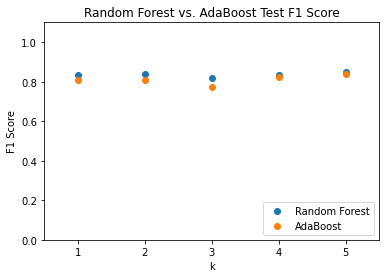

In [182]:
# Plot Random Forest vs. AdaBoost Test F1 Score
plt.scatter([1,2,3,4,5], rf_test_f1)
plt.scatter([1,2,3,4,5], ab_test_f1)
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.title("Random Forest vs. AdaBoost Test F1 Score")
plt.legend(["Random Forest", "AdaBoost"], loc="lower right")
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0.5, 5.5])
plt.show()

The above plot compares the f1 score of Random Forest and AdaBoost Regressors. The f1 score is higher for Random Forest in all cases. F1 score explanation has similar reasoning as that of the balanced accuracy reasoning.

#### Feature Importance 

In [188]:
regr = RandomForestRegressor(max_depth=13, max_features=9, random_state=0)
regr.fit(x_train_folds[0], y_train_folds[0]) # Train the model on training data
importances = regr.feature_importances_
feature_names = df.columns.tolist()
feature_names.remove("AdoptionLikelihood")
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

              Feature  Gini Importance
1                Size         0.301162
0           AgeMonths         0.204743
2          Vaccinated         0.113441
5         AdoptionFee         0.100934
3     HealthCondition         0.095340
4   TimeInShelterDays         0.075118
9               IsDog         0.037319
6       PreviousOwner         0.011219
15           IsOrange         0.009875
12            IsBlack         0.009401
13             IsGray         0.008548
14            IsWhite         0.007523
7            IsRabbit         0.007333
11            IsBrown         0.006629
10              IsCat         0.005853
8              IsBird         0.005562


In the best case of the Random Forest model, the top four most importance features are Size, AgeMonths, Vaccinated, and AdoptionFee respectively.

## Discussion and Conclusion 

#### Discussion of Learning and Takeaways

Throughout this project, I learned a lot along the way. First, I learned how to handle categorical data and transformed them into numerical data so that they can be ingested by the regression model. Secondly, I learned how to handle imbalanced data through the use of StratifiedKFold cross validation to split train and test dataset. In the future project, I might try undersampling and oversampling method instead to test out the result. In addition to data splitting, I learned to select metrics that can work with imbalanced data like balanced accuracy and f1 score. In the future project, I look forward to using other metrics such as ROC and AUC as well. 

During the analysis, top four most importance features are Size, AgeMonths, Vaccinated, and AdoptionFee. It is intuitive that most people tend to go for a younger pet according to my experience. Although Size and AgeMonths are not something that can be controlled by the shelter, Vaccinated and AdoptionFee can. With this information about the feature importance, shelters may try to incentivize people to adopt more pets by ensuring that all pets are vaccinated. They may also consider lowering adoption fee to encourage more people to adopt available pets.

#### Discussion of why something didn't work

I was a bit surprised that the multiple linear regresssion model performed as poorly as it did. This is mainly because the multiple linear regression model relies heavily on feature correlations. As shown in the correlation matrix and pair plots, the pet adoption dataset has very poor feature correlation. Despite removing insignificant features and interactions iteration after iteration, the model still was not a good fit at the end.

#### Suggests ways to improve 

Although this project was initially classified as a regresssion problem in the beginning due to numerical value in the label (AdoptionLikelihood) column, this project may also be classified as a classification problem as well since the label only contain two values 0 and 1. It would be interesting to see how well the Random Forest and AdaBoost algorithms perform if the project is treated as a classification problem. Another ways to improve is through a more thorough hyperparameter tuning. In this project, hyperparameter tuning was performed for only 2 of many hyperparameters in the Random Forest regressor. It would be more interesting to see if other hyperparameters would have better impact on the test performance.  